opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


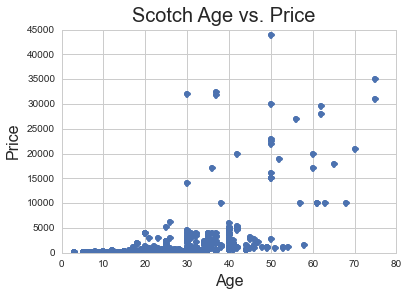

In [484]:
%matplotlib inline
import pprint
from pprint import pprint
import re
import os
from os import listdir
from os.path import isfile, join, walk
import csv
from storm.locals import *
import sqlite3
from collections import Counter
import matplotlib.mlab as mlab
from matplotlib import pyplot as plt
import math
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
from statistics import mean, stdev
from scipy.stats import t
from scipy import stats
import pylab 
from __future__ import division


import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py


class Retailer(object):
    __storm_table__ = "RETAILER"
    RETAILER_ID = Int(primary=True)
    NAME = Unicode()
    TYPE = Unicode()
    CITY = Unicode()
    STATE = Unicode()
    COUNTRY = Unicode()
    SHIPPING_COST = Float()
    ADDITIONAL_COST = Float()
    
      
    def __init__(self, name, retailer_type, city, state, country, shipping_cost, additional_cost):
        # self.RETAILER_ID = int(retailer_id)
        self.NAME = u'' + name
        self.TYPE = u'' + retailer_type
        self.CITY = u'' + city
        self.STATE = u'' + state
        self.COUNTRY = u'' + country
        self.SHIPPING_COST = float(shipping_cost)
        self.ADDITIONAL_COST = float(additional_cost)

    def __str__(self):
        return 'Retailer[ RETAILER_ID = ' + str(self.RETAILER_ID) + ', NAME = ' + self.NAME + ', TYPE = ' + self.TYPE + ', CITY = ' + self.CITY + ', STATE = ' + self.STATE + ', COUNTRY = ' + self.COUNTRY + ', SHIPPING_COST = ' + str(self.SHIPPING_COST) + ', ADDITIONAL_COST = ' +  str(self.ADDITIONAL_COST) + ']'

    
class Distillery(object):
    __storm_table__ = "DISTILLERY"
    DISTILLERY_ID = Int(primary=True)
    NAME = Unicode()
    REGION = Unicode()
      
    def __init__(self, name, region):
        # self.DISTILLERY_ID = int(distillery_id)
        self.NAME = u'' + name
        self.REGION = u'' + region

    def __str__(self):
        return 'Distillery[ DISTILLERY_ID = ' + str(self.DISTILLERY_ID) + ', NAME = ' + self.NAME + ', REGION = ' + self.REGION + ']'

    
class Producer(object):
    __storm_table__ = "PRODUCER"
    PRODUCER_ID = Int(primary=True)
    NAME = Unicode()
      
    def __init__(self, name):
        # self.PRODUCER_ID = int(producer_id)
        self.NAME = u'' + name

    def __str__(self):
        return 'Producer[ PRODUCER_ID = ' + str(self.PRODUCER_ID) + ', NAME = ' + self.NAME + ']'

    
class Scotch(object):
    __storm_table__ = "SCOTCH"
    SCOTCH_ID = Int(primary=True)
    PRODUCER = Int()
    DISTILLERY = Int()
    NAME = Unicode()
    AGE = Int()
    
    def __init__(self, producer, distillery, name, age):
        # self.SCOTCH_ID = int(scotch_id)
        self.PRODUCER = int(producer)
        self.DISTILLERY = int(distillery)
        self.NAME = u'' + name
        self.AGE = int(age)

    def __str__(self):
        return 'Scotch[ SCOTCH_ID = ' + str(self.SCOTCH_ID) + ', PRODUCER = ' + str(self.PRODUCER) + ', DISTILLERY = ' + str(self.DISTILLERY) + ', NAME = ' + self.NAME + ', AGE = ' + str(self.AGE) + ']'

class Price(object):
    __storm_table__ = "PRICE"
    PRICE_ID = Int(primary=True)
    RETAILER = Int()
    SCOTCH = Int()
    PRICE = Float()
    
    def __init__(self, retailer, scotch, price):
        # self.SCOTCH_ID = int(scotch_id)
        self.RETAILER = int(retailer)
        self.SCOTCH = int(scotch)
        self.PRICE = float(price)

    def __str__(self):
        return 'Price[ PRICE_ID = ' + str(self.PRICE_ID) + ', RETAILER = ' + str(self.RETAILER) + ', SCOTCH = ' + str(self.SCOTCH) + ', PRICE = ' + str(self.PRICE) + ']'
    

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

plt.suptitle('Scotch Age vs. Price', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Price', fontsize=16)

plt.plot(age, price, "o")





    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Outliers

When correlating age to price, we can see a pretty tight clustering in the sub-thousand dollar range in the 0-40 range, and tapering off a bit in the 50s. But the outliers really start around the 30 year range. This is where we see our shining stars, dollar-wise.

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db
Signatory Vintage Scotch Whisky - Glenfarclas - 40 years old, $5249.99
Tobermory - Tobermory - 42 years old, $5250.0
Macallan - Macallan - 25 years old, $5299.0
Tobermory - Tobermory - 42 years old, $5499.0
Balvenie - Balvenie - 40 years old, $6069.95
Macallan - Macallan - 26 years old, $6299.0
Gordon & MacPhail - Glenlivet - 61 years old, $9999.0
Gordon & MacPhail - Linkwood - 61 years old, $9999.0
Gordon & MacPhail - Mortlach - 63 years old, $9999.0
Gordon & MacPhail - Strathisla - 57 years old, $9999.0
Macallan - Macallan - 68 years old, $9999.0
Bowmore - Bowmore - 38 years old, $9999.99
Macallan - Macallan - 30 years old, $13999.0
Glen Grant - Glen Grant - 50 years old, $14999.0
Glen Grant - Glen Grant - 50 years old, $14999.0
Highland Park - Highland Park - 50 years old, $15999.0
Gordon & MacPhail - Glen Grant - 60 years old, $16999.0
Macallan - Macallan - 36 years old, $16999.0
Macallan - Macall

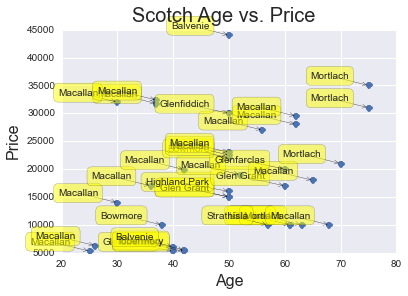

In [256]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE > 5000).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    print str(data[i][0]) + ' - ' + str(data[i][1]) + ' - ' + str(data[i][2]) + ' years old, $' + str(data[i][3])
    plt.annotate(data[i][1], 
                 xy = (data[i][2], data[i][3]), 
                 xytext = (-20, 5),
                 textcoords = 'offset points', 
                 ha = 'right', 
                 va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.suptitle('Scotch Age vs. Price', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Price', fontsize=16)

plt.plot(age, price, "o")

    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


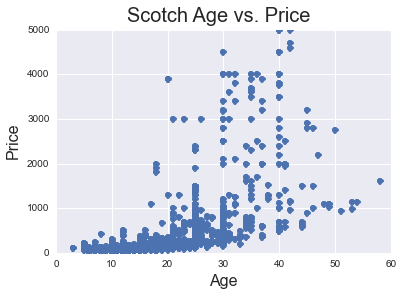

In [257]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE < 5001).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

    
plt.plot(age, price, 'o')



plt.suptitle('Scotch Age vs. Price', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Price', fontsize=16)

    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Tightening the Range

If we restrict our dollar value to under \$10,000, we start to see a clear pattern emerge.

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


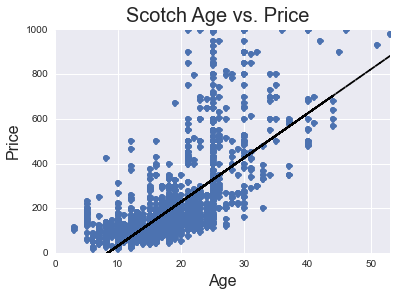

In [258]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE < 1001).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

    
fit = np.polyfit(age, price, 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

# plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
    

plt.suptitle('Scotch Age vs. Price', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Price', fontsize=16)

plt.plot(age, price, 'o', age, fit_fn(age), '--k')
plt.xlim(0, max(age))
plt.ylim(0, max(price))


    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


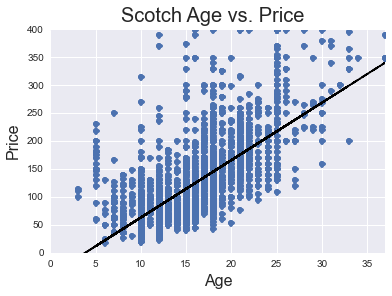

In [260]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE < 401).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

    
fit = np.polyfit(age, price, 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

# plt.plot(x,y, 'yo', x, fit_fn(x), '--k')


plt.suptitle('Scotch Age vs. Price', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Price', fontsize=16)

plt.plot(age, price, 'o', age, fit_fn(age), '--k')
plt.xlim(0, max(age))
plt.ylim(0, max(price))



    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# I'm frugal! What's over 12 years, but under 50 bucks?
Note: The output is in LaTeX table format.

In [261]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 12,
                     Price.PRICE < 50).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    print '\hline'
    print str(data[i][0]) + ' & ' + str(data[i][1]) + ' & ' + str(data[i][2]) + ' & ' + str(data[i][3]) + ' & ' + str(data[i][4]) + '\\\\'
    
print '[1ex]'
print '\hline'
    

    

    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db
\hline
Lismore & Unknown Speyside & 15 & 39.99 & Liquorama\\
\hline
Tullibardine & Tullibardine & 14 & 39.99 & Binnys\\
\hline
Lismore & Unknown Speyside & 15 & 39.99 & Hi-Time Wine\\
\hline
Lismore & Unknown Speyside & 15 & 41.95 & Love Scotch\\
\hline
William Maxwell and Co. &  & 18 & 41.98 & Ace Spirits\\
\hline
Glenfiddich & Glenfiddich & 14 & 44.98 & Hi-Time Wine\\
\hline
Glen Moray & Glen Moray & 16 & 44.99 & Binnys\\
\hline
Glenlivet & Glenlivet & 15 & 44.99 & Hi-Time Wine\\
\hline
Tomintoul & Tomintoul & 16 & 44.99 & Ultimate Wine Shop\\
\hline
Lismore & Unknown Speyside & 15 & 44.99 & Wine and Cheese Place\\
\hline
William Lundie and Co. &  & 15 & 48.99 & Ace Spirits\\
\hline
Glenfiddich & Glenfiddich & 14 & 49.99 & Liquorama\\
\hline
Lismore & Unknown Speyside & 18 & 49.99 & Liquorama\\
\hline
Glenlivet & Glenlivet & 15 & 49.99 & Liquorama\\
\hline
Craigellachie & Craigellachie & 13 & 49.99 

# Confidence Intervals by Age

In [274]:
MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

def StudentTCI(mu, sigma, df, alpha=0.95):
    return t.interval(alpha, df, mu, sigma)

min_price = scotch_store.find(Price).min(Price.PRICE)
    
for age in range(1, 80):
    
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE < 1000).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    
    price = []
    for i in range(0, len(data)):
        price.append(data[i][3])

    if (len(price) < 2):
        continue
        
    mu = mean(price)
    sigma = stdev(price)
    n = len(price)
    maxPrice = max(price)
    minPrice = min(price)
    
    if (n < 10):
        continue

    ninetyfivePercentCI = StudentTCI(mu, sigma, n)
    ninetyPercentCI = StudentTCI(mu, sigma, n, 0.90)

    if (ninetyPercentCI[0] >= min_price):
        print "Age: " + str(age)
        print "n = " + str(n)
        print "mu = " + str(mu)
        print "sigma = " + str(sigma)
        print "min = " + str(minPrice)
        print "max = " + str(maxPrice)
        print "90% confidence: " + str(age) + ": " + str(ninetyPercentCI)
        print "95% confidence of mean price for " + str(age) + ": " + str(ninetyfivePercentCI)
    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

Age: 5
n = 20
mu = 156.5805
sigma = 47.092973269
min = 59.0
max = 229.95
90% confidence: 5: (75.358389889555696, 237.80261011044428)
95% confidence of mean price for 5: (58.346279137775824, 254.81472086222419)
Age: 9
n = 13
mu = 97.8307692308
sigma = 30.3923972021
min = 29.99
max = 148.95
90% confidence: 9: (44.00785804141362, 151.6536804201248)
95% confidence of mean price for 9: (32.171986920564649, 163.48955154097379)
Age: 11
n = 36
mu = 97.4
sigma = 25.7877164557
min = 49.99
max = 170.0
90% confidence: 11: (53.862657340941674, 140.93734265905832)
95% confidence of mean price for 11: (45.100086957193504, 149.69991304280651)
Age: 13
n = 58
mu = 95.6618965517
sigma = 36.2830643137
min = 49.99
max = 184.5
90% confidence: 13: (35.012840178828185, 156.31095292462007)
95% confidence of mean price for 13: (23.033452377820893, 168.2903407256274)
Age: 14
n = 101
mu = 82.890990099
sigma = 27.8764673338
min = 39.99
max = 199.99
90% confidence: 14: (36.613806634456061, 129.16817356356373)
95% c

# Best Bargains by Age

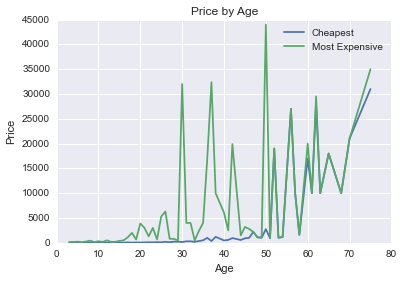

3: Kilchoman, Kilchoman - 99.99 [Binnys]
5: James MacArthur, Bunnahabhain - 59.0 [Whiskey Shop USA]
6: Lismore, Unknown Speyside - 16.99 [Hi-Time Wine]
7: Signatory Vintage Scotch Whisky,  - 37.95 [Love Scotch]
7: Signatory Vintage Scotch Whisky,  - 37.95 [Love Scotch]
8: Ian Macleod Distillers,  - 26.99 [Hi-Time Wine]
9: Gordon & MacPhail, Miltonduff - 29.99 [Binnys]
10: Speyburn, Speyburn - 18.99 [Hi-Time Wine]
11: Classic Cask, Bowmore - 49.99 [Hi-Time Wine]
11: Gordon & MacPhail, Bunnahabhain - 49.99 [Beltramos]
12: Glen Ness, Glen Ness - 22.99 [Ace Spirits]
13: Craigellachie, Craigellachie - 49.99 [Astor Wines and Spirits]
13: Craigellachie, Craigellachie - 49.99 [Caskers]
13: Craigellachie, Craigellachie - 49.99 [Hi-Time Wine]
13: Craigellachie, Craigellachie - 49.99 [Wine and Cheese Place]
14: Tullibardine, Tullibardine - 39.99 [Binnys]
15: Lismore, Unknown Speyside - 39.99 [Hi-Time Wine]
15: Lismore, Unknown Speyside - 39.99 [Liquorama]
16: Tomintoul, Tomintoul - 44.99 [Ultimat

In [289]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

cheap_scotch = []
expensive_scotch = []
cheap_ages = []
cheap_prices = []
expensive_ages = []
expensive_prices = []

for age in range(1, 80):
    
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Scotch.AGE > 0).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    price = []
    for i in range(0, len(data)):
        price.append(data[i][3])

    if (len(price) == 0):
        continue

    minPrice = min(price)
    maxPrice = max(price)    
    
    cheap_scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE == minPrice)
    cheapos = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in cheap_scotch_rs]

    expensive_scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE == maxPrice)
    expensives = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in expensive_scotch_rs]

    if (len(cheapos) != 0):
        for j in range(0, len(cheapos)):
            cheap_scotch.append(cheapos[j])
            cheap_ages.append(cheapos[j][2])
            cheap_prices.append(cheapos[j][3])
            
    if (len(expensives) != 0):
        for j in range(0, len(expensives)):
            expensive_scotch.append(expensives[j])
            expensive_ages.append(expensives[j][2])
            expensive_prices.append(expensives[j][3])


plt.plot(cheap_ages, cheap_prices, label='Cheapest')
plt.plot(expensive_ages, expensive_prices, label='Most Expensive')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Price by Age')
plt.legend()
plt.show()

for i in range(0, len(cheap_scotch)):
    print str(cheap_scotch[i][2]) + ": " + cheap_scotch[i][0] + ", " + cheap_scotch[i][1] + " - " + str(cheap_scotch[i][3]) + " [" + cheap_scotch[i][4] + "]"

for i in range(0, len(expensive_scotch)):
    print str(expensive_scotch[i][2]) + ": " + expensive_scotch[i][0] + ", " + expensive_scotch[i][1] + " - " + str(expensive_scotch[i][3]) + " [" + expensive_scotch[i][4] + "]"
    

scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Distributions of Age (< $1000)

Percentage of 10 year olds: 10.914347669
Percentage of 12 year olds: 17.3111673292
Percentage of 15 year olds: 8.3845319841
Percentage of 18 year olds: 10.9866281171
Percentage of 21 year olds: 7.33646548609
Percentage of 25 year olds: 4.98735092158
Percentage of 30 year olds: 1.69859053126


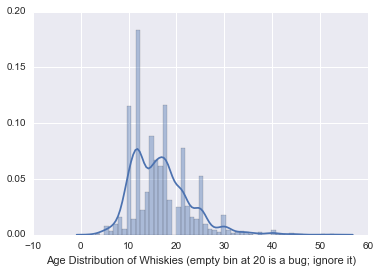

In [291]:
MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

def StudentTCI(mu, sigma, df, alpha=0.95):
    return t.interval(alpha, df, mu, sigma)

age_count = []
price_count = []
tenYearOlds = 0
twelveYearOlds = 0
fifteenYearOlds = 0
eighteenYearOlds = 0
twentyOneYearOlds = 0
twentyFiveYearOlds = 0
thirtyYearOlds = 0
for age in range(1, 80):
        
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE < 1000).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    
    for i in range(0, len(data)):
        age_count.append(age)
        if (age == 10):
            tenYearOlds += 1
        if (age == 12):
            twelveYearOlds += 1
        if (age == 15):
            fifteenYearOlds += 1
        if (age == 18):
            eighteenYearOlds += 1
        if (age == 21):
            twentyOneYearOlds += 1
        if (age == 25):
            twentyFiveYearOlds += 1
        if (age == 30):
            thirtyYearOlds += 1
        price_count.append(round(data[i][3]))


print "Percentage of 10 year olds: " + str( float((tenYearOlds / len(age_count)) * 100) )
print "Percentage of 12 year olds: " + str( float((twelveYearOlds / len(age_count)) * 100) )
print "Percentage of 15 year olds: " + str( float((fifteenYearOlds / len(age_count)) * 100) )
print "Percentage of 18 year olds: " + str( float((eighteenYearOlds / len(age_count)) * 100) )
print "Percentage of 21 year olds: " + str( float((twentyOneYearOlds / len(age_count)) * 100) )
print "Percentage of 25 year olds: " + str( float((twentyFiveYearOlds / len(age_count)) * 100) )
print "Percentage of 30 year olds: " + str( float((thirtyYearOlds / len(age_count)) * 100) )
sns.distplot(age_count, bins=max(age_count), axlabel="Age Distribution of Whiskies (empty bin at 20 is a bug; ignore it)");
#sns.distplot(price_count);

scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Distributions of Price (< $1000)

When modeled as a normal distribution, price skews greatly to the right. It is better modeled as a log-normal distribution.

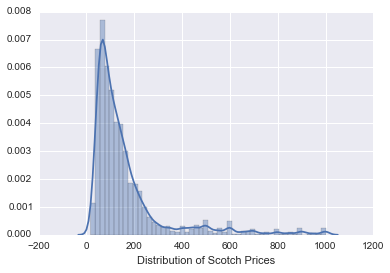

In [293]:
MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

age_count = []
price_count = []
for age in range(1, 80):
        
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE < 1000).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    for i in range(0, len(data)):
        age_count.append(age)
        price_count.append(data[i][3])
        price_count_ln.append(math.log(round(data[i][3])))
    
sns.distplot(price_count, axlabel="Distribution of Scotch Prices");


scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Price as a Log-Normal Distribution

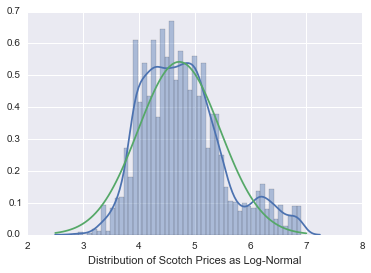

In [294]:
MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

age_count = []
price_count = []
for age in range(1, 80):
        
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE < 1000).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    for i in range(0, len(data)):
        age_count.append(age)
        price_count.append(data[i][3])
        price_count_ln.append(math.log(round(data[i][3])))
    
sns.distplot(price_count_ln, axlabel="Distribution of Scotch Prices as Log-Normal");

mean = 4.72149661207
variance = 0.54098677141
sigma = math.sqrt(variance)
x = np.linspace(2.5,7,100)
plt.plot(x,mlab.normpdf(x,mean,sigma))


scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Point Estimates

---------------------------------- Ages
Count of ages: 2767
Mean of ages: 15.5968685096
Median of ages: 16.0
Variance of ages: 36.617099683
St. Dev. of ages: 6.05011290648
Skewness of ages: 1.15886900521
Kurtosis of ages: 2.55240414588
Entropy of ages: 7.86312516216
---------------------------------- Prices
Count of prices: 2767
Mean of prices: 118.858218844
Median of prices: 110.0
Variance of prices: 26751.9973455
St. Dev. of prices: 163.530820073
Skewness of prices: 2.7330322061
---------------------------------- Prices (Log-Normal)
Count of prices: 2767
Mean of prices: 4.72355666548
Median of prices: 4.70048036579
Variance of prices: 0.541478675209
St. Dev. of prices: 0.735719364706
Skewness of prices: 0.663397610579
---------------------------------- Prices (Log-Normal exp)
Count of prices: 2767
Mean of prices: 112.567907918
Median of prices: 110.0
Variance of prices: 1.71854615592
St. Dev. of prices: 2.08698275438
Skewness of prices: 1.94137718535
Point Estimate for mu_LN = 4.7779

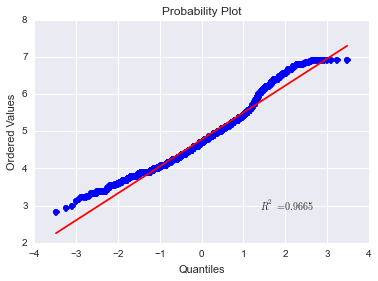

In [296]:
MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

age_count = []
price_count = []
price_count_ln = []
for age in range(1, 80):
        
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE < 1000).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    for i in range(0, len(data)):
        age_count.append(age)
        price_count.append(round(data[i][3]))
        price_count_ln.append(math.log(round(data[i][3])))

print "---------------------------------- Ages"
print "Count of ages: " + str(len(age_count))
print "Mean of ages: " + str(stats.gmean(age_count))
print "Median of ages: " + str(np.nanmedian(age_count))
print "Variance of ages: " + str(stats.tvar(age_count))
print "St. Dev. of ages: " + str(np.nanstd(age_count))
print "Skewness of ages: " + str(stats.skew(age_count))
print "Kurtosis of ages: " + str(stats.kurtosis(age_count))
print "Entropy of ages: " + str(stats.entropy(age_count))

print "---------------------------------- Prices"
print "Count of prices: " + str(len(price_count))
print "Mean of prices: " + str(stats.gmean(price_count))
print "Median of prices: " + str(np.nanmedian(price_count))
print "Variance of prices: " + str(stats.tvar(price_count))
print "St. Dev. of prices: " + str(np.nanstd(price_count))
print "Skewness of prices: " + str(stats.skew(price_count))

print "---------------------------------- Prices (Log-Normal)"
print "Count of prices: " + str(len(price_count_ln))
print "Mean of prices: " + str(stats.gmean(price_count_ln))
print "Median of prices: " + str(np.nanmedian(price_count_ln))
print "Variance of prices: " + str(stats.tvar(price_count_ln))
print "St. Dev. of prices: " + str(np.nanstd(price_count_ln))
print "Skewness of prices: " + str(stats.skew(price_count_ln))

print "---------------------------------- Prices (Log-Normal exp)"
print "Count of prices: " + str(len(price_count_ln))
print "Mean of prices: " + str(math.exp(stats.gmean(price_count_ln)))
print "Median of prices: " + str(math.exp(np.nanmedian(price_count_ln)))
print "Variance of prices: " + str(math.exp(stats.tvar(price_count_ln)))
print "St. Dev. of prices: " + str(math.exp(np.nanstd(price_count_ln)))
print "Skewness of prices: " + str(math.exp(stats.skew(price_count_ln)))

mean_ln = 0.0
for i in range(0, len(price_count)):
    mean_ln += (math.log(price_count[i]) / len(price_count))
    
var_ln = 0.0
for i in range(0, len(price_count)):
    var_ln += (math.pow(math.log(price_count[i]) - mean_ln, 2) / len(price_count))
print "Point Estimate for mu_LN = " + str(mean_ln)
print "Point Estimate for var_LN = " + str(var_ln)
print "Point Estimate for stdev_LN = " + str(math.sqrt(var_ln))

fig = plt.figure()
stats.probplot(price_count_ln, plot=plt)
plt.show()


scotch_store.flush()
scotch_store.commit()
scotch_store.close()

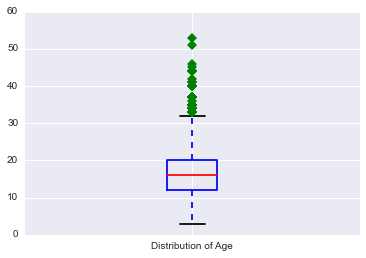

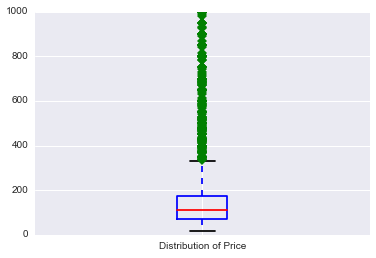

In [300]:
MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

age_count = []
price_count = []
price_count_ln = []
for age in range(1, 80):
        
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE < 1000).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    for i in range(0, len(data)):
        age_count.append(age)
        price_count.append(round(data[i][3]))
        price_count_ln.append(math.log(round(data[i][3])))

fig = plt.figure()
plt.boxplot(age_count, 0, 'gD', labels=["Distribution of Age"])

fig = plt.figure()
plt.boxplot(price_count, 0, 'gD', labels=["Distribution of Price"])

scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Cheapest Retailers

In [462]:
MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

scotch_rs = scotch_store.find(Scotch).order_by(Scotch.SCOTCH_ID)
scotch_arr = [scotch.SCOTCH_ID for scotch in scotch_rs]

retailer_rs = scotch_store.find(Retailer).order_by(Retailer.RETAILER_ID)
retailer_arr = [retailer.RETAILER_ID for retailer in retailer_rs]

q = 0
scotch_price_2d_arr = []
for scotch in scotch_arr:
    q += 1

    row_arr = []
    # Start with scotch ID
    row_arr.append(scotch)

    # For each reatiler, check to see if we have a price
    # If we do, append it to the i,jth cell
    # NOTE: This is an incredibly inefficient way of doing this. Way too many db hits.
    #       I would never deploy this to production. But since this is research...
    for retailer in retailer_arr:
        # Find by retailer_id and scotch_id
        scotch_retailer_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.SCOTCH_ID == scotch,
                     Retailer.RETAILER_ID == retailer)

        # If no hits, append 0
        if (scotch_retailer_rs.count() == 0):
            row_arr.append(0)

        # If we got a match, append the price
        else:
            price_tmp = [price.PRICE for scotch_tmp, price, producer, distillery, retailer in scotch_retailer_rs]
            print price_tmp
            row_arr.append(price_tmp[0])



    scotch_price_2d_arr.append(row_arr)
                                  
        
scotch_price_matr = np.matrix(scotch_price_2d_arr)
print (scotch_price_matr)

scotch_store.flush()
scotch_store.commit()
scotch_store.close()

[66.99]
[64.98]
[64.99]
[69.99]
[74.99]
[69.99]
[69.99]
[68.95]
[79.99]
[79.99]
[55.99]
[99.99]
[89.99]
[107.99]
[108.99]
[89.99]
[99.99]
[112.95]
[99.98]
[110.0]
[44.98]
[46.99]
[49.99]
[54.99]
[47.99]
[62.99]
[46.99]
[42.99]
[53.99]
[58.95]
[69.99]
[48.49]
[59.99]
[51.99]
[37.99]
[43.99]
[42.95]
[52.5]
[164.99]
[189.99]
[199.99]
[184.99]
[167.99]
[179.99]
[203.95]
[219.99]
[219.99]
[169.99]
[46.99]
[34.96]
[39.99]
[44.99]
[35.99]
[39.99]
[40.95]
[59.99]
[39.98]
[36.99]
[59.99]
[124.99]
[129.98]
[74.99]
[59.99]
[59.99]
[66.98]
[39.98]
[45.99]
[52.99]
[65.99]
[53.99]
[45.99]
[57.99]
[71.95]
[78.99]
[69.99]
[49.98]
[58.99]
[77.0]
[44.99]
[159.99]
[139.99]
[159.99]
[139.99]
[132.99]
[125.99]
[149.99]
[142.95]
[149.99]
[129.98]
[158.49]
[145.0]
[133.99]
[234.99]
[199.99]
[229.99]
[199.99]
[239.99]
[218.99]
[199.99]
[239.99]
[229.95]
[248.99]
[229.99]
[244.99]
[250.0]
[199.99]
[4999.99]
[49.99]
[49.99]
[49.99]
[54.99]
[54.95, 91.95]
[59.99]
[47.99]
[57.0]
[134.99]
[119.98]
[129.99]
[125.99

In [490]:
MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

scotch_rs = scotch_store.find(Scotch).order_by(Scotch.SCOTCH_ID)
scotch_arr = [scotch.SCOTCH_ID for scotch in scotch_rs]

retailer_rs = scotch_store.find(Retailer).order_by(Retailer.RETAILER_ID)
retailer_arr = [retailer.RETAILER_ID for retailer in retailer_rs]


scotch_price_arr = scotch_price_matr.getA()
print scotch_price_arr[0]
# Loop over each retailer
#for i in range(0, len(retailer_arr)):
#scotch_price_matr

# init 
print len(scotch_price_arr)
compare_2d_arr = []
for i in range(0, len(retailer_arr)):
    compare_2d_arr.append([])
    for j in range(0, len(retailer_arr)):
        compare_2d_arr[i].append(0)
    
print compare_2d_arr
# The comparison matrix as a 2D array

for j in range(1, len(scotch_price_arr)):
    row_arr = []
    for k in range(j, len(scotch_price_arr[0])):
        for i in range(0, len(scotch_price_arr[0])):
            if (scotch_price_arr[i][j] > 0 and scotch_price_arr[i][k] > 0):
                price_diff = scotch_price_arr[i][j] - scotch_price_arr[i][k]
                compare_2d_arr[j][k] += price_diff
            else:
                compare_2d_arr[j][k] += 0 # ;;; do nothing
            # row - column
            #row_arr.append(totals_arr[i] - totals_arr[j])
    #compare_2d_arr.append(row_arr)
    
print compare_2d_arr

# Make a matrix out of the comparisons
compare_matr = np.matrix(compare_2d_arr)

print compare_matr

# Sum the rows of the comparison matrix, giving us a score for each retailer
score_arr = np.sum(compare_matr, axis=1).A



# Make an array of tuples with the retailer ID and SCORE
retailer_score = []
for i in range(0, len(score_arr)):
    retailer_score.append((retailer_arr[i], score_arr[i]))
    
print retailer_score

result = sorted((retailer for retailer in retailer_score),
                key=lambda x: x[1])

just_scores = [(retailer, score[0]) for retailer, score in result]

final_retailer_scores = []
for retailer_score in just_scores:
    retailer = scotch_store.find(Retailer, Retailer.RETAILER_ID == retailer_score[0]).one()
    final_retailer_scores.append((retailer.NAME, retailer_score[1]))
    
idx_arr = [i for i in range(1, len(final_retailer_scores) + 1)]

retailers_series = pd.Series([retailer for retailer, score in final_retailer_scores], index=idx_arr)
scores_series = pd.Series([score for retailer, score in final_retailer_scores], index=idx_arr)

d = {'retailer' : retailers_series,
     'score' : scores_series}

scores_df = pd.DataFrame(d)
#print scores_df

sns.set(style="whitegrid")

# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
ax = sns.barplot(x='score', y='retailer', data=scores_df, label="Total", color="b")
ax.set_title("Retailer Scores (Smaller is Better)")
# Add a legend and informative axis label
#ax.set(xlim=(0, 24), ylabel="",
#       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)



scotch_store.flush()
scotch_store.commit()
scotch_store.close()


[  2.    66.99   0.    64.98  64.99  69.99  74.99  69.99   0.     0.    69.99
  68.95   0.    79.99   0.     0.    79.99  55.99]
1608
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0

IndexError: list index out of range